### **Binary Classification**

##### **Check the Environment Setting**

In [1]:
# Check whether they are installed and version
import sys
print(f"Python      : {sys.version}")

import scipy
print(f"Scipy       : {scipy.__version__}")

import numpy
print(f"Numpy       : {numpy.__version__}")

import matplotlib
print(f"Matplotlib  : {matplotlib.__version__}")

import pandas
print(f"Pandas      : {pandas.__version__}")

import sklearn
print(f"Scikit-Learn: {sklearn.__version__}")

Python      : 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Scipy       : 1.14.0
Numpy       : 1.26.4
Matplotlib  : 3.9.0
Pandas      : 2.2.2
Scikit-Learn: 1.5.1


##### **Problem Definition**
In this analysis we will use the `Sonar Mines vs Rocks` dataset. The problem is to predict `Metal` or `Rock` objects from sonar return data. Each pattern is a set of 60 numbers in the range of 0.0 to 1.0. The numbers represents the energy within a particular frequency band, integrated over a certain period of time. The associated label of each record distinguishes the classes - `M` for Mine (Metal Cylinder) and `R` for Rock.

##### **Load the Dataset**

`Import Libraries`

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

`Load Data`

In [32]:
datapath = "F:/courses/mlds_nactar/dataset/sonar.csv"
data = pd.read_csv(datapath, header=None)

##### **Analyze Data**

In [7]:
# Shape of the Data
data.shape

(208, 61)

In [14]:
# Take a LOOK of Data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [15]:
# Attribute Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [16]:
# Data Description
#pd.set_option('precision', 2)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [28]:
# Check Correlation
data.corr(method='pearson')

KeyError: "['60'] not found in axis"

In [17]:
# Class Distribution
print(data.groupby(60).size())

60
M    111
R     97
dtype: int64


##### **Data Visualization**

`Univariate Plots`

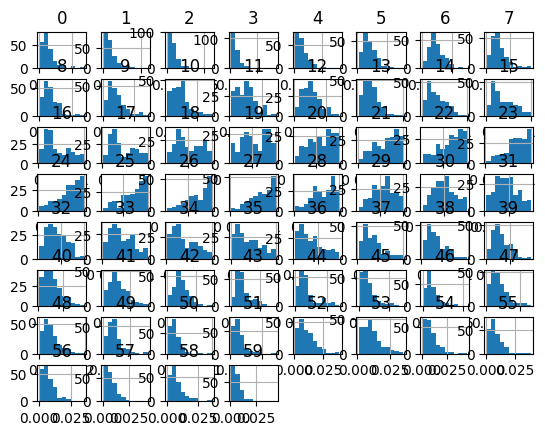

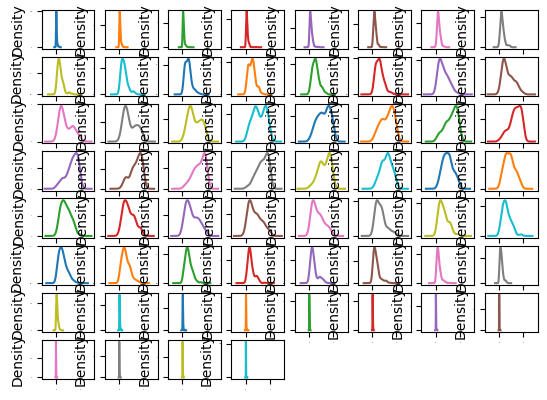

In [21]:
# Histogram and Density Plot
data.hist()
data.plot(kind='density', subplots=True, layout=(8,8), legend=False, fontsize=1)
plt.show()

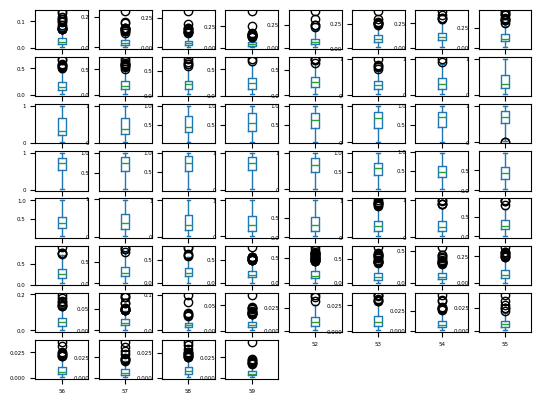

In [22]:
# Box and Whisker Plot
data.plot(kind='box', subplots=True, layout=(8,8), fontsize=4)
plt.show()

`Multivariate Plots`

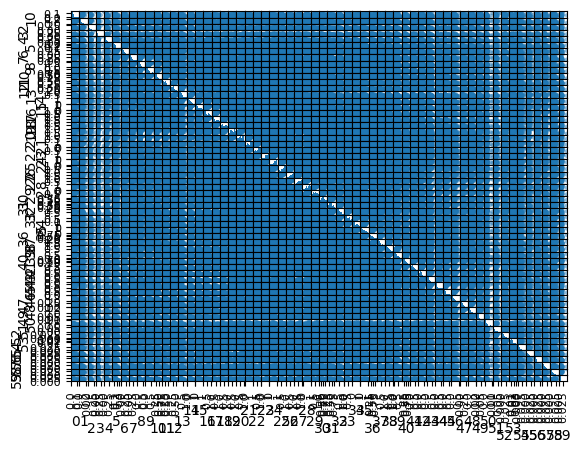

In [29]:
# Scatter Plot Matrix
scatter_matrix(data)
plt.show()

In [37]:
data = data[60].drop()
data.head()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

ValueError: could not convert string to float: 'R'

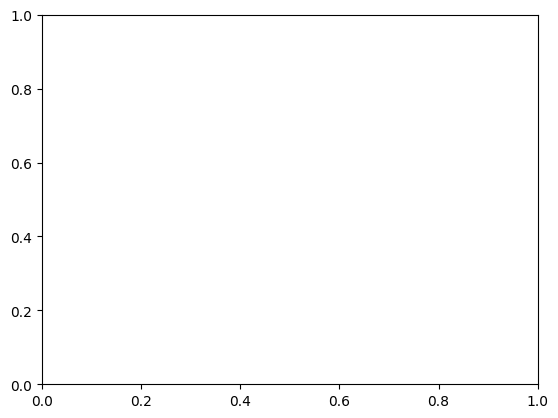

In [33]:
# Correlation Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation=None)
fig.colorbar(cax)
plt.show()

##### **Validation Dataset**

In [38]:
# Split-out Validation Dataset
data = data.values
x = data[:,:-1].astype(float)
y = data[:,-1]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=7)

# Check the splitted shapes
print(f"X_train: {x_train.shape}, Y_train: {y_train.shape}")
print(f"X_valid: {x_validation.shape},  Y_valid: {y_validation.shape}")

X_train: (166, 60), Y_train: (166,)
X_valid: (42, 60),  Y_valid: (42,)


##### **Evaluate Algorithms (Baseline)**

LR   : 77.17
LDA  : 77.87
KNN  : 75.88
CART : 72.87
GNB  : 68.27
SVM  : 76.51


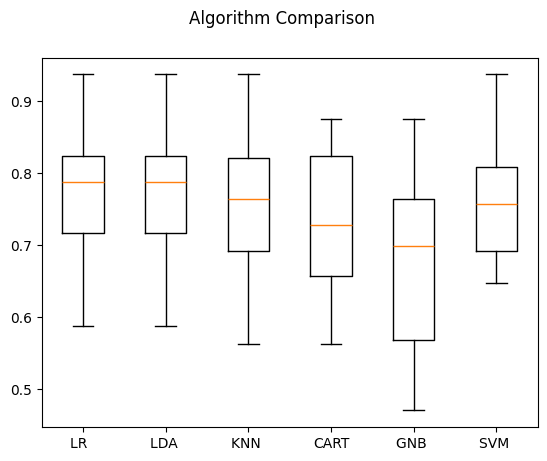

In [41]:
import warnings
warnings.filterwarnings('ignore')
# Spot Check Algorithms
models = []
models.append(('LR  ', LogisticRegression()))
models.append(('LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN ', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB ', GaussianNB()))
models.append(('SVM ', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)  # by default random_state=None and shuffle=False
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean()*100:.2f}")
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### **Evaluate Algorithms (Standardization)**

ScaledLR   : 75.44
ScaledLDA  : 77.87
ScaledNB   : 68.27
ScaledKNN  : 80.85
ScaledCART : 73.35
ScaledSVM  : 82.61


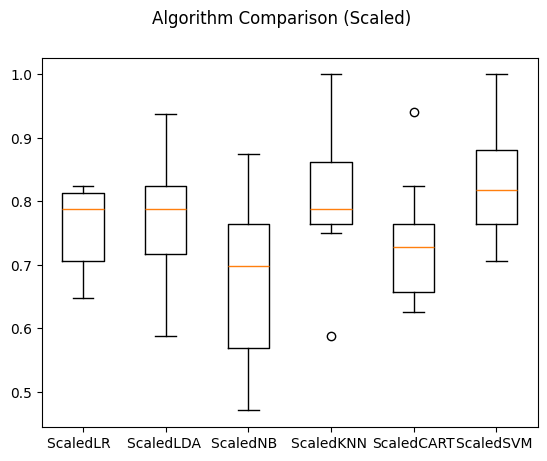

In [43]:
# Standardize the Dataset
pipelines = []
pipelines.append(('ScaledLR  ', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA ', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledNB  ', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledKNN ', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM ', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

# Evaluate Each Model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean()*100:.2f}")
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison (Scaled)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`Improve Results with Tuning`

In [45]:
# Tuning KNN
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
k_values = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_result = grid.fit(rescaled_x, y_train)
print(f"Best: {grid_result.best_score_*100:.2f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): print(f"{mean*100:.2f} ({stdev:.4f}) with {param}")

Best: 83.60 using {'n_neighbors': 1}
83.60 (0.0795) with {'n_neighbors': 1}
81.36 (0.0880) with {'n_neighbors': 3}
81.43 (0.0969) with {'n_neighbors': 5}
77.76 (0.1204) with {'n_neighbors': 7}
73.01 (0.0994) with {'n_neighbors': 9}
74.15 (0.0740) with {'n_neighbors': 11}
71.07 (0.1058) with {'n_neighbors': 13}
72.32 (0.0810) with {'n_neighbors': 15}
69.89 (0.0727) with {'n_neighbors': 17}
71.07 (0.0913) with {'n_neighbors': 19}
69.89 (0.0912) with {'n_neighbors': 21}


In [47]:
# Tuning SVM
'''
We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel.
The default kernel for SVC is 'RBF (Radial Basis Function)' with a C value of '1.0'.
With 10-fold cross validation on standardized training data, like SVM, here we will also try some simpler kernels as well as
some C values less than and more than standard 1.0. This will help us finding optimal kernel with optimal C value.
'''
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_result = grid.fit(rescaled_x, y_train)
print(f"Best: {grid_result.best_score_*100:.2f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): print(f"{mean*100:.2f} ({stdev:.4f}) with {param}")

Best: 85.00 using {'C': 1.7, 'kernel': 'rbf'}
74.85 (0.0700) with {'C': 0.1, 'kernel': 'linear'}
58.27 (0.1271) with {'C': 0.1, 'kernel': 'poly'}
60.11 (0.1844) with {'C': 0.1, 'kernel': 'rbf'}
71.29 (0.1166) with {'C': 0.1, 'kernel': 'sigmoid'}
75.44 (0.0823) with {'C': 0.3, 'kernel': 'linear'}
64.41 (0.0999) with {'C': 0.3, 'kernel': 'poly'}
74.23 (0.0819) with {'C': 0.3, 'kernel': 'rbf'}
74.85 (0.0700) with {'C': 0.3, 'kernel': 'sigmoid'}
76.58 (0.0703) with {'C': 0.5, 'kernel': 'linear'}
70.48 (0.0982) with {'C': 0.5, 'kernel': 'poly'}
78.46 (0.0689) with {'C': 0.5, 'kernel': 'rbf'}
76.07 (0.0656) with {'C': 0.5, 'kernel': 'sigmoid'}
75.99 (0.0832) with {'C': 0.7, 'kernel': 'linear'}
75.96 (0.0938) with {'C': 0.7, 'kernel': 'poly'}
81.43 (0.0598) with {'C': 0.7, 'kernel': 'rbf'}
76.10 (0.0796) with {'C': 0.7, 'kernel': 'sigmoid'}
76.54 (0.0670) with {'C': 0.9, 'kernel': 'linear'}
78.97 (0.0942) with {'C': 0.9, 'kernel': 'poly'}
80.81 (0.0629) with {'C': 0.9, 'kernel': 'rbf'}
76.07 

`[NB]` We can see that the most accurate configuration is SVM with 'RBF' kernel and a C value of '1.7'. The accuracy of this configuration 85.00 seemingly better than ScaledKNN.

##### **Ensemble Methods**

ScaledAB  : 78.27
ScaledGBM : 79.60
ScaledRF  : 81.47
ScaledET  : 86.80


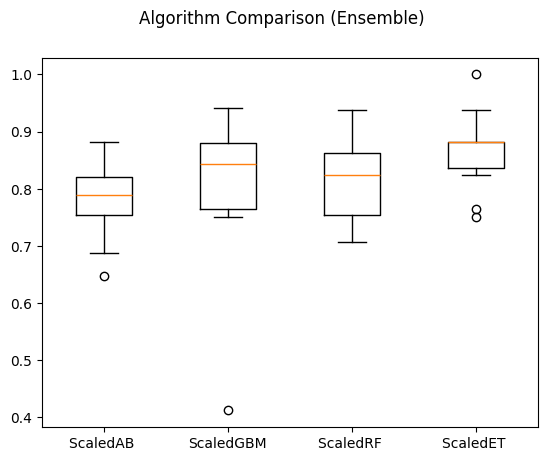

In [48]:
# Ensembles
ensembles = []
ensembles.append(('ScaledAB ', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF ', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET ', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])))

# Evaluate Each Model in turn
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean()*100:.2f}")
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison (Ensemble)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`Improve Results with Tuning`

The default numbers of boosting stages to perform (n_estimators) is 100. It is an ideal candidate parameter for any boosting and bagging algorithms to tune but sometimes it many vary. To ensure that, in this section we will look at tuning the number of stages for best performed `Extra Trees (ET)` bagging method on scaled data. We define a parameter grid n_estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [49]:
# Tuning ET
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 300, 350, 400]))
model = ExtraTreesClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_result = grid.fit(rescaled_x, y_train)
print(f"Best: {grid_result.best_score_*100:.2f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): print(f"{mean*100:.2f} ({stdev:.4f}) with {param}")

Best: 87.98 using {'n_estimators': 300}
82.57 (0.0786) with {'n_estimators': 50}
87.43 (0.1013) with {'n_estimators': 100}
85.59 (0.0859) with {'n_estimators': 150}
84.93 (0.0772) with {'n_estimators': 200}
87.98 (0.0766) with {'n_estimators': 300}
86.84 (0.0637) with {'n_estimators': 350}
86.21 (0.0848) with {'n_estimators': 400}


##### **Finalize Model**
Here, we will finalize the `Extra Trees (ET)` bagging method and evaluate it on our validation dataset. First we need to prepare the model and train it on the entire standardized training dataset. We will then scale the validation dataset and generate predictions. For error estimation we will use `mean_squared_error` and `n_estimators=300`.

In [53]:
# Finalize the Model
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
model = ExtraTreesClassifier(random_state=7, n_estimators=300)
model.fit(rescaled_x, y_train)

# Transform the Validation Dataset
rescaled_validation_x = scaler.transform(x_validation)
predictions = model.predict(rescaled_validation_x)
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy: {accuracy*100:.2f} %")
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_validation, predictions))
print(f"\nClassification Report:")
print(classification_report(y_validation, predictions))

Accuracy: 90.48 %

Confusion Matrix:
[[25  2]
 [ 2 13]]

Classification Report:
              precision    recall  f1-score   support

           M       0.93      0.93      0.93        27
           R       0.87      0.87      0.87        15

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



`Evaluate Best Algorithm`

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Data
data = pd.read_csv("F:/courses/mlds_nactar/dataset/sonar.csv")

# Split-out Validation Dataset
data = data.values
x = data[:,:-1].astype(float)
y = data[:,-1]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=7)

# Make Prediction on Validation Dataset
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

# Evaluate Predictions
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy: {accuracy*100:.2f} %")
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

Accuracy: 92.86 %
[[24  2]
 [ 1 15]]
              precision    recall  f1-score   support

           M       0.96      0.92      0.94        26
           R       0.88      0.94      0.91        16

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

